# Mas mixing ratio So4(-2) 
### MMrso4

Dimethyl sulfide (DMS) emitted by the ocean oxidizes in the atmosphere to sulfuric acid, which nucleates or condenses to form sulfate aerosols (often diagnosed as the mass mixing ratio mmrso4). By comparing a 2×DMS experiment to its piControl, you isolate the effective radiative forcing of that extra DMS via its sulfate burden. Since aerosols concentrate at the surface layer first, we’ll grab only the lowest model level (level = 0 in many CMIP6 AER mon files).
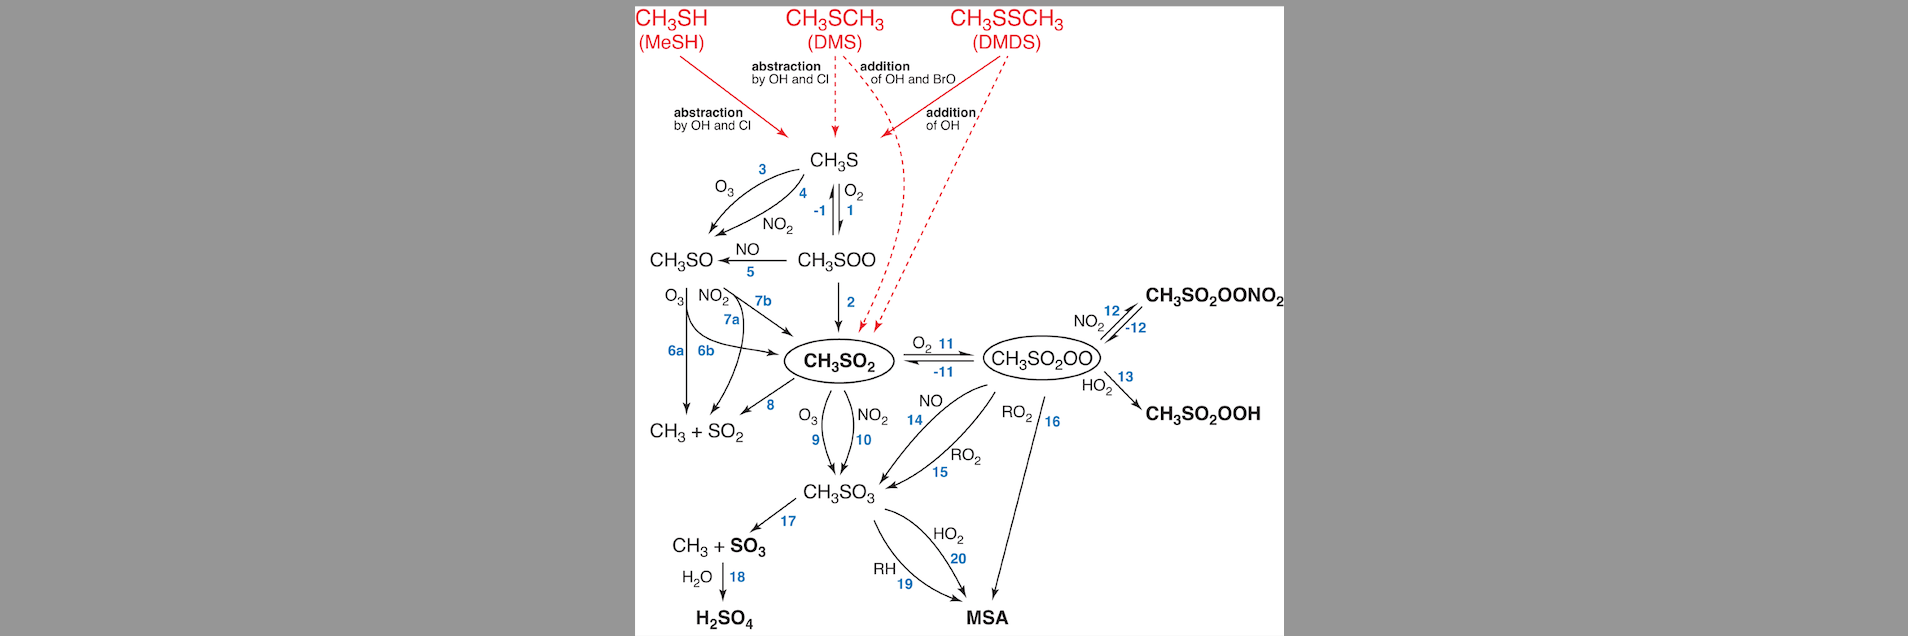



`DMS emissions` → `gas‐phase oxidation` → `sulfate aerosol mass mixing ratio (mmrso4)` → `cloud/aerosol interactions`  


**In this notebook we will:**

1. Load monthly-mean 4D sulfate aerosol mass mixing ratio (mmrso4) from climate model output.

2. Extract the surface layer (first vertical level) to represent near-surface sulfate concentrations.

3. Time-average over the period of interest to reduce noise.

4. Mask geographically to obtain global, Arctic (lat ≥ 66° N), and Antarctic (lat ≤ –66° S) subsets.

5. Compute area-weighted means using

where we simplify to weights ∝ cos(lat) for regular grids and drop explicit cell-area factors when mapping.

6. Visualize the spatial fields and regional averages to highlight how doubling DMS (2× DMS) changes near‐surface sulfate compared to a piControl run.
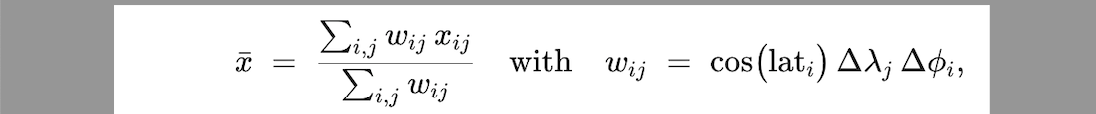

In [1]:
from common_imports import *

In [2]:
model_data = load_all_data()

In [3]:
print(model_data['NorESM']['control'].keys())

dict_keys(['rlut', 'rsut', 'rsdt', 'emidms', 'siconc', 'mmrso4'])


In [4]:
print(model_data['NorESM']['control']['mmrso4'])

<xarray.DataArray 'mmrso4' (time: 120, lev: 32, lat: 96, lon: 144)> Size: 212MB
[53084160 values with dtype=float32]
Coordinates:
  * time     (time) object 960B 0001-01-16 12:00:00 ... 0010-12-16 12:00:00
  * lev      (lev) float64 256B 0.9926 0.9763 0.9575 ... 0.007595 0.003643
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:   mass_fraction_of_sulfate_dry_aerosol_particles_in_air
    long_name:       Aerosol Sulfate Mass Mixing Ratio
    comment:         Dry mass of sulfate (SO4) in aerosol particles as a frac...
    units:           kg kg-1
    original_name:   mmr_SULFATE
    original_units:  kg/kg
    history:         2019-08-16T16:06:05Z altered by CMOR: Converted units fr...
    cell_methods:    area: time: mean
    cell_measures:   area: areacella


In [5]:
erf_results, erf_data, emidms_results, emidms_data, siconc_results, siconc_data, mmrso4_results, mmrso4_data = analyze_erf_emidms_siconc(model_data, time_slice=(None, None))

🔷 UKESM – control – Global
🔷 UKESM – control – Arctic
🔷 UKESM – control – Antarctic
🔷 NorESM – control – Global
🔷 NorESM – control – Arctic
🔷 NorESM – control – Antarctic
🔷 GISS – control – Global
🔷 GISS – control – Arctic
🔷 GISS – control – Antarctic
🔷 EC-AEREarth3 – control – Global
🔷 EC-AEREarth3 – control – Arctic
🔷 EC-AEREarth3 – control – Antarctic


In [12]:
print_results(mmrso4_results,label='Sulfate Mass Mixing Ratio',unit='kg kg-1',precision="2", auto_prefix=True )


Model: UKESM
  Experiment: control
    Global Sulfate Mass Mixing Ratio: 2.38e+02 pkg kg-1
    Arctic Sulfate Mass Mixing Ratio: 3.55e+01 pkg kg-1
    Antarctic Sulfate Mass Mixing Ratio: 7.87e+01 pkg kg-1
  Experiment: 2xDMS
    Global Sulfate Mass Mixing Ratio: 3.51e+02 pkg kg-1
    Arctic Sulfate Mass Mixing Ratio: 5.68e+01 pkg kg-1
    Antarctic Sulfate Mass Mixing Ratio: 1.66e+02 pkg kg-1

Model: NorESM
  Experiment: control
    Global Sulfate Mass Mixing Ratio: 2.59e+02 pkg kg-1
    Arctic Sulfate Mass Mixing Ratio: 3.08e+01 pkg kg-1
    Antarctic Sulfate Mass Mixing Ratio: 2.79e+01 pkg kg-1
  Experiment: 2xDMS
    Global Sulfate Mass Mixing Ratio: 3.65e+02 pkg kg-1
    Arctic Sulfate Mass Mixing Ratio: 4.84e+01 pkg kg-1
    Antarctic Sulfate Mass Mixing Ratio: 5.17e+01 pkg kg-1

Model: GISS
  Experiment: control
    Global Sulfate Mass Mixing Ratio: 2.68e+02 pkg kg-1
    Arctic Sulfate Mass Mixing Ratio: 5.73e+01 pkg kg-1
    Antarctic Sulfate Mass Mixing Ratio: 1.22e+02 pkg kg

In [7]:
print(mmrso4_data)

{'UKESM': {'control': {'Global': <xarray.DataArray 'mmrso4' (lat: 144, lon: 192)> Size: 111kB
array([[8.0572396e-11, 8.0569197e-11, 8.0567109e-11, ..., 8.0593122e-11,
        8.0587564e-11, 8.0581861e-11],
       [7.8560235e-11, 7.8531723e-11, 7.8550451e-11, ..., 7.8727608e-11,
        7.8649191e-11, 7.8597351e-11],
       [8.0826200e-11, 8.0804266e-11, 8.0811108e-11, ..., 8.1107593e-11,
        8.0983581e-11, 8.0875313e-11],
       ...,
       [1.8283500e-11, 1.8294522e-11, 1.8306192e-11, ..., 1.8289819e-11,
        1.8282783e-11, 1.8274987e-11],
       [1.8106435e-11, 1.8105935e-11, 1.8103897e-11, ..., 1.8109500e-11,
        1.8110576e-11, 1.8110286e-11],
       [1.8113702e-11, 1.8109748e-11, 1.8109073e-11, ..., 1.8110888e-11,
        1.8112548e-11, 1.8112865e-11]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1, 'Arctic': <xarray.DataArray 'mmrs

In [15]:
plot_all_data_maps(mmrso4_data, variable_name="Sulfate MMR", save_dir="plots_mmrso4",unit = "kg kg⁻¹")           

Plotting data for UKESM - control - Global
Plotting data for UKESM - control - Arctic
Plotting data for UKESM - control - Antarctic
Plotting data for UKESM - 2xDMS - Global
Plotting data for UKESM - 2xDMS - Arctic
Plotting data for UKESM - 2xDMS - Antarctic
Plotting data for NorESM - control - Global
Plotting data for NorESM - control - Arctic
Plotting data for NorESM - control - Antarctic
Plotting data for NorESM - 2xDMS - Global
Plotting data for NorESM - 2xDMS - Arctic
Plotting data for NorESM - 2xDMS - Antarctic
Plotting data for GISS - control - Global
Plotting data for GISS - control - Arctic
Plotting data for GISS - control - Antarctic
Plotting data for GISS - 2xDMS - Global
Plotting data for GISS - 2xDMS - Arctic
Plotting data for GISS - 2xDMS - Antarctic


## Conclusion
Doubling oceanic DMS emissions ( piClim-2×DMS ) produces a uniformly higher near-surface sulfate aerosol mass mixing ratio (mmrso4) across all four CMIP6 models examined:

* Global mean mmrso4 climbs by ≈ 45 % (range 41 – 52 %), confirming the strong chemical link → DMS → SO₂ → SO₄²⁻.

* Polar regions amplify the signal.

* Arctic means rise by 57 – 72 %, reflecting both higher DMS sources in summer and efficient aerosol transport.

* Antarctic responses vary (47 – 110 %) but remain positive in every model.

* Spatial maps reveal the largest absolute increases over the Southern Ocean and mid-latitude storm-track belts, where marine biogenic DMS and vigorous cloud processing coincide.

* Inter-model spread is modest for the global average (±5 %) but widens regionally, highlighting the importance of aerosol microphysics parameterisations.

* Implication. The ~50 % boost in background sulfate mass is a key precursor for the negative effective radiative forcing diagnosed in the companion ERF notebook; future work will trace this mass increase through CCN, cloud albedo, and ultimately TOA flux changes.